In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [16]:
COLORS = {
    'green': '#009e73',
    'blue': '#0072b2',
    'yellow': '#f1e443',
    'orange': '#e69f03',
    'red': '#d55f00',
    'purple': '#cc79a7'
}

In [17]:
# Helper to grab the CSV-encoded string from the log file
def get_csv_vals(filename):
    try:
        with open (filename, "r") as myfile:
            data = myfile.readlines()
            # find the line after the line that starts with "CSV"
            for i, line in enumerate(data):
                if line.startswith("CSV"):
                    return [float(x) for x in data[i+1].strip().split(',')]
    except Exception as e:
        print("Error reading file: " + filename)
        print(e)
            
HONEST_COMMIT = 0
DISHONEST_COMMIT = 1
RANDOMNESS = 2
QUERY = 3

# --- LOAD DATA ---

# Epsilon - Data
# n=1024, d=7, s=7

epsilon_vals = [10, 1, 0.1]
epsilon_categories = ['ε = ' + str(c) for c in epsilon_vals]

epsilon_filenames = [
    'eval-epsilon-db-1024-d-7-e-10-s-7.log',
    'eval-epsilon-db-1024-d-7-e-1-s-7.log',
    'eval-epsilon-db-1024-d-7-e-0,1-s-7.log'
]
epsilon_data = [
    get_csv_vals(f) for f in epsilon_filenames
]

epsilon_groups = {
    "Honest Comm Phase (s)": [data[HONEST_COMMIT] for data in epsilon_data],
    "Dishonest Comm Phase (s)": [data[DISHONEST_COMMIT] for data in epsilon_data],
    "Rand Gen Phase (s)": [data[RANDOMNESS] for data in epsilon_data],
    "Query Phase (s)": [data[QUERY] for data in epsilon_data]
}

# DB Size - Data
# d=7, e=1, s=7

db_size_categories = [str(c) for c in [1024, 2048, 4096, 8192, 16384]]

db_filenames = [
    'eval-size-db-1024-d-7-e-1-s-7.log',
    'eval-size-db-2048-d-7-e-1-s-7.log',
    'eval-size-db-4096-d-7-e-1-s-7.log',
    'eval-size-db-8192-d-7-e-1-s-7.log',
    'eval-size-db-16384-d-7-e-1-s-7.log'
]
db_data = [
    get_csv_vals(f) for f in db_filenames
]

db_size_groups = {
    "Honest Comm Phase (s)": [data[HONEST_COMMIT] for data in db_data],
    "Dishonest Comm Phase (s)": [data[DISHONEST_COMMIT] for data in db_data],
    "Rand Gen Phase (s)": [data[RANDOMNESS] for data in db_data],
    "Query Phase (s)": [data[QUERY] for data in db_data]
}

# DB Dimension - Data
# n=1024, e=1, s=7

db_dim_categories = [str(c) for c in [7, 10, 12, 14]]

db_dim_filenames = [
    'eval-dimension-db-1024-d-7-e-1-s-7.log',
    'eval-dimension-db-1024-d-10-e-1-s-7.log',
    'eval-dimension-db-1024-d-12-e-1-s-7.log',
    'eval-dimension-db-1024-d-14-e-1-s-7.log'
]
db_dim_data = [
    get_csv_vals(f) for f in db_dim_filenames
]

db_dim_groups = {
    "Honest Comm Phase (s)": [data[HONEST_COMMIT] for data in db_dim_data],
    "Dishonest Comm Phase (s)": [data[DISHONEST_COMMIT] for data in db_dim_data],
    "Rand Gen Phase (s)": [data[RANDOMNESS] for data in db_dim_data],
    "Query Phase (s)": [data[QUERY] for data in db_dim_data]
}

# DB Sparsity - Data
# n=1024, d=7, e=1

sparsity_x = [*range(1, 2**7)]

sparsity_filename = 'eval-sparsity-db-1024-d-7-e-1-s-7-nodishonest.log'
try:
    with open (sparsity_filename, "r") as myfile:
        data = myfile.readlines()
        sparsity_vals = []
        record = False
        # find the line after the line that starts with "CSV"
        for i, line in enumerate(data):
            if line.startswith("=== Begin Sparsity Experiment ==="):
                record = True
            elif line.startswith("=== End Sparsity Experiment ==="):
                break
            elif record:
                if line.strip() != "": # skip empty lines, save the rest, skipping the first (sparsity) x value
                    sparsity_vals.append([float(x) for x in line.strip().split(',')[1:]])
except Exception as e:
    print("Error reading file: " + sparsity_filename)
    print(e)

sparsity_homomorphic_s = [l[0] for l in sparsity_vals]
sparsity_verify_s = [l[1] for l in sparsity_vals]

In [18]:
corner_font_size = 18
axis_font_size = 14
tick_font_size = 12
legend_font_size = 10

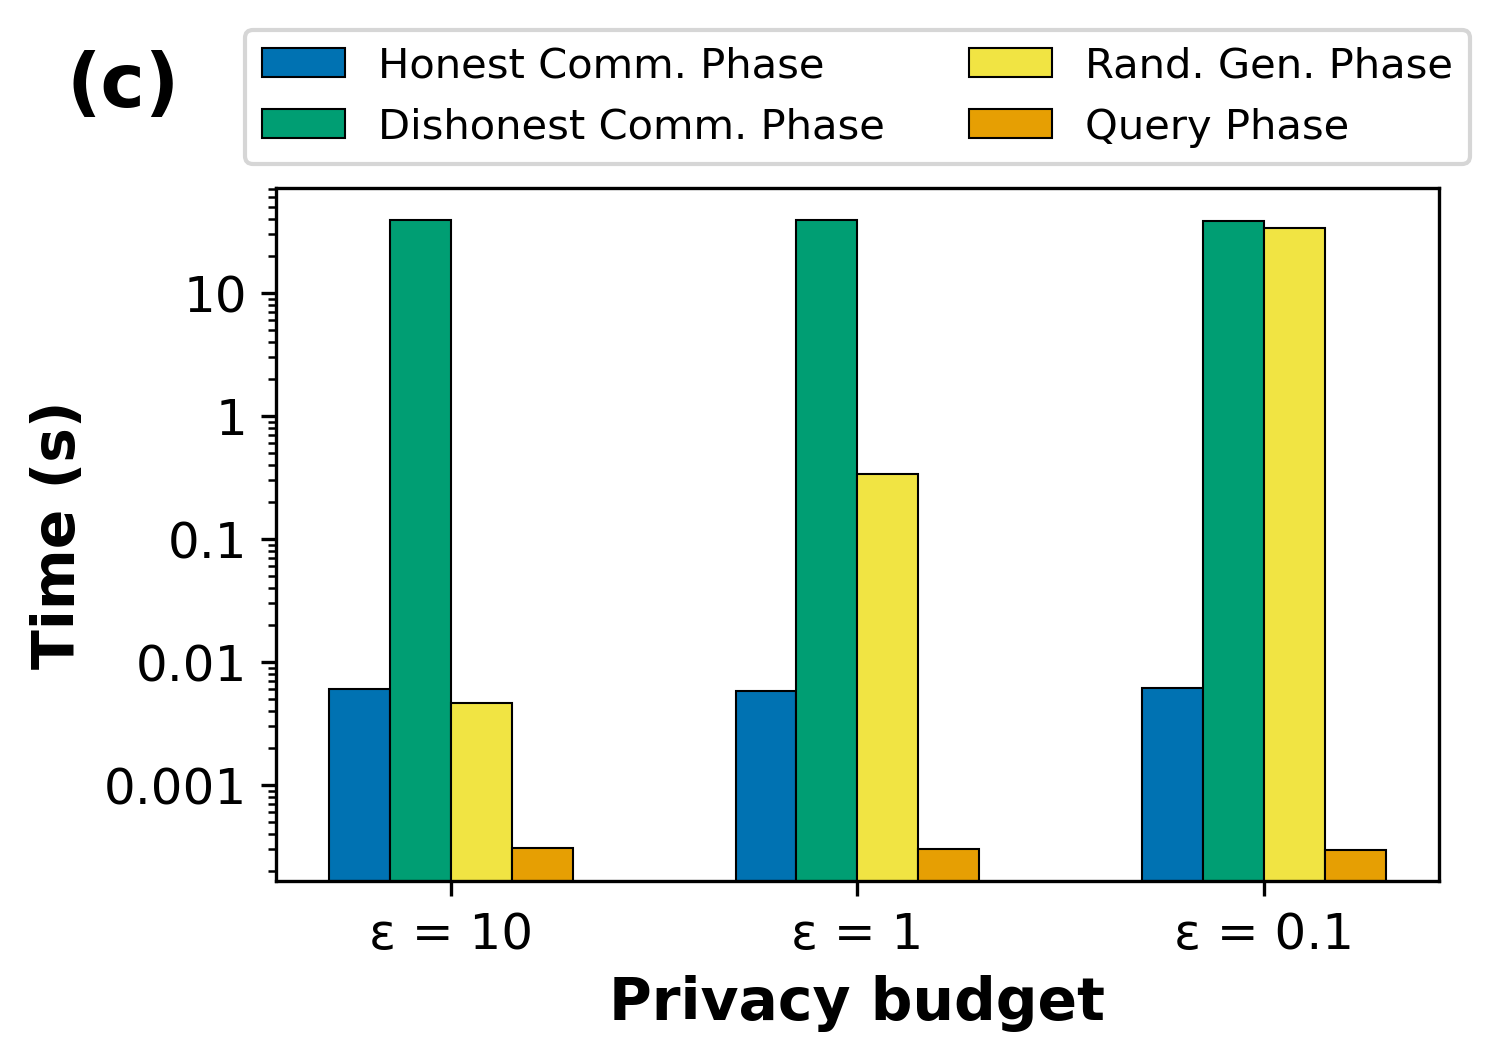

In [19]:
def epsilon_format_func(value, tick_number):
    return f'{value:.0f}' if value >= 1 else f'{value:.1f}' if value >= 0.1 else f'{value:.2f}' if value >= 0.01 else f'{value:.3f}'

epsilon_fig, epsilon_ax = plt.subplots(dpi=300, figsize=(5, 3))
bar_width = 0.15
line_width = 0.5

r1 = np.arange(len(epsilon_categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

epsilon_ax.bar(r1, epsilon_groups["Honest Comm Phase (s)"], color=COLORS['blue'], width=bar_width, linewidth=line_width, edgecolor='black', label='Honest Comm. Phase')
epsilon_ax.bar(r2, epsilon_groups["Dishonest Comm Phase (s)"], color=COLORS['green'], width=bar_width, linewidth=line_width, edgecolor='black', label='Dishonest Comm. Phase')
epsilon_ax.bar(r3, epsilon_groups["Rand Gen Phase (s)"], color=COLORS['yellow'], width=bar_width, linewidth=line_width, edgecolor='black', label='Rand. Gen. Phase')
epsilon_ax.bar(r4, epsilon_groups["Query Phase (s)"], color=COLORS['orange'], width=bar_width, linewidth=line_width, edgecolor='black', label='Query Phase')

plt.xlabel('Privacy budget', fontweight='bold', fontsize=axis_font_size)
plt.xticks([r + bar_width*1.5 for r in range(len(epsilon_categories))], epsilon_categories, fontsize=tick_font_size)
plt.ylabel('Time (s)', fontweight='bold', fontsize=axis_font_size)

epsilon_ax.set_yscale('log')
epsilon_ax.yaxis.set_major_formatter(FuncFormatter(epsilon_format_func))

plt.text(-0.18, 1.2, '(c)', horizontalalignment='left', verticalalignment='top', transform=epsilon_ax.transAxes, fontweight='bold', fontsize=corner_font_size)
plt.yticks(fontsize=tick_font_size)

plt.legend(ncol=2, bbox_to_anchor=(0.5, 1.005), loc='lower center', fontsize=legend_font_size)
plt.savefig('epsilon.png', dpi=300, bbox_inches='tight')
plt.show()


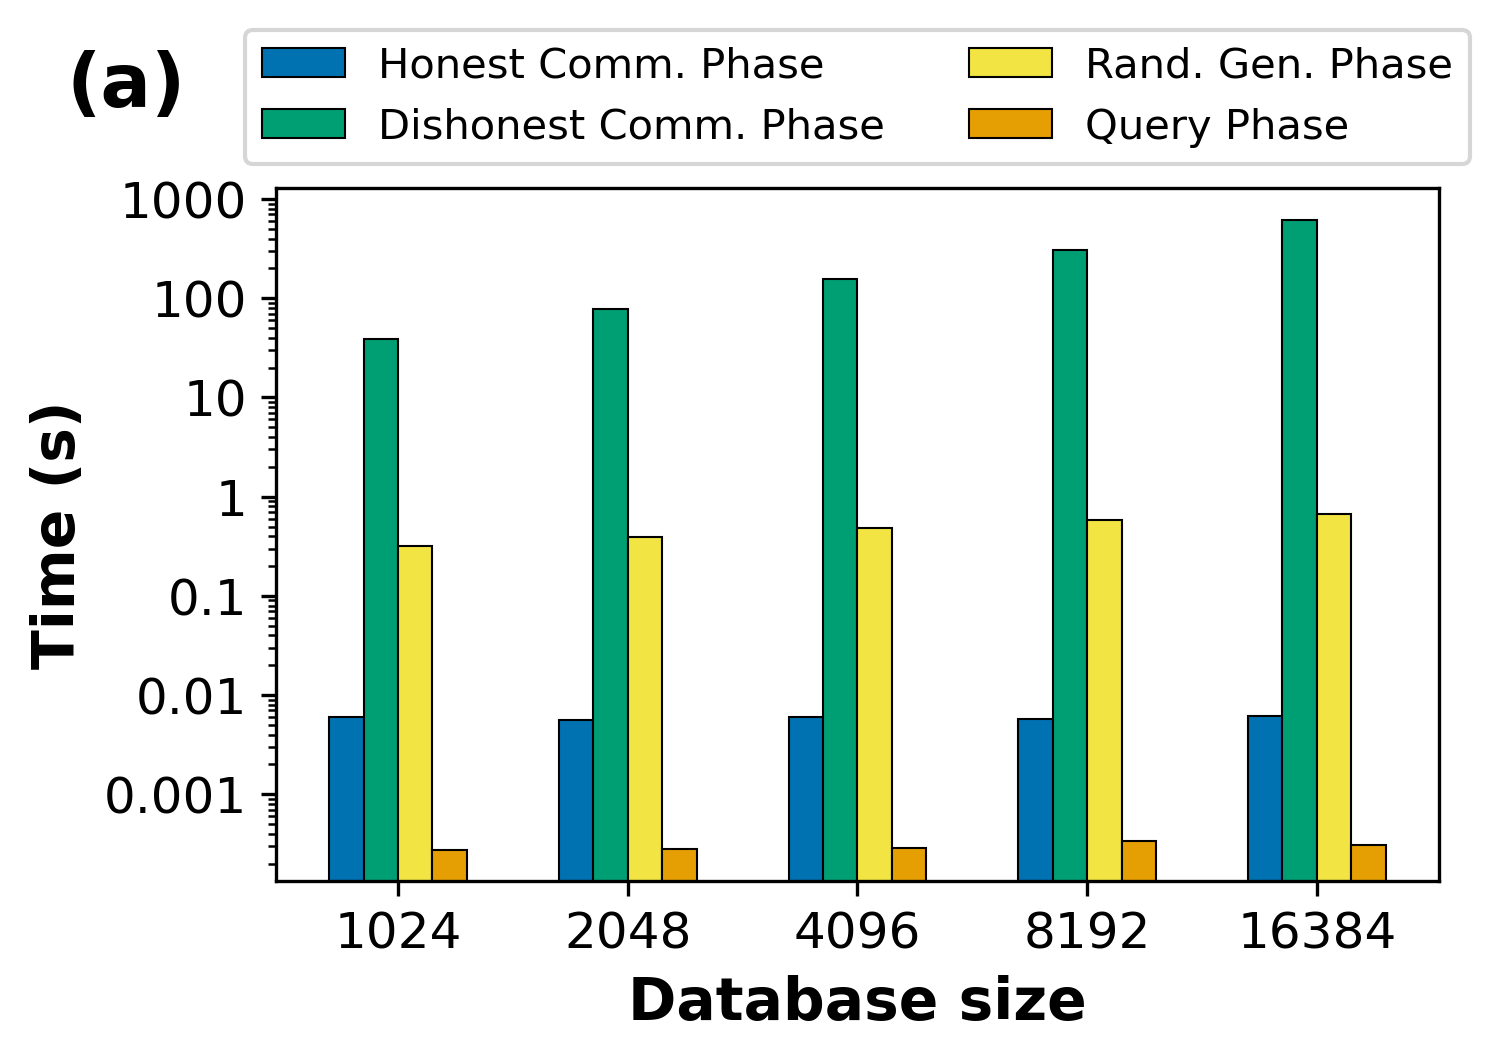

In [20]:
def db_size_format_func(value, tick_number):
    return f'{value:.0f}' if value >= 1 else f'{value:.1f}' if value >= 0.1 else f'{value:.2f}' if value >= 0.01 else f'{value:.3f}'

db_size_fig, db_size_ax = plt.subplots(dpi=300, figsize=(5, 3))
bar_width = 0.15
line_width = 0.5

r1 = np.arange(len(db_size_categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

db_size_ax.bar(r1, db_size_groups["Honest Comm Phase (s)"], color=COLORS['blue'], width=bar_width, linewidth=line_width, edgecolor='black', label='Honest Comm. Phase')
db_size_ax.bar(r2, db_size_groups["Dishonest Comm Phase (s)"], color=COLORS['green'], width=bar_width, linewidth=line_width, edgecolor='black', label='Dishonest Comm. Phase')
db_size_ax.bar(r3, db_size_groups["Rand Gen Phase (s)"], color=COLORS['yellow'], width=bar_width, linewidth=line_width, edgecolor='black', label='Rand. Gen. Phase')
db_size_ax.bar(r4, db_size_groups["Query Phase (s)"], color=COLORS['orange'], width=bar_width, linewidth=line_width, edgecolor='black', label='Query Phase')

plt.xlabel('Database size', fontweight='bold', fontsize=axis_font_size)
plt.xticks([r + bar_width*1.5 for r in range(len(db_size_categories))], db_size_categories, fontsize=tick_font_size)
plt.ylabel('Time (s)', fontweight='bold', fontsize=axis_font_size)

db_size_ax.set_yscale('log')
db_size_ax.yaxis.set_major_formatter(FuncFormatter(db_size_format_func))

plt.text(-0.18, 1.2, '(a)', horizontalalignment='left', verticalalignment='top', transform=db_size_ax.transAxes, fontweight='bold', fontsize=corner_font_size)
plt.yticks(fontsize=tick_font_size)

plt.legend(ncol=2, bbox_to_anchor=(0.5, 1.005), loc='lower center', fontsize=legend_font_size)
plt.savefig('db_size.png', dpi=300, bbox_inches='tight')
plt.show()

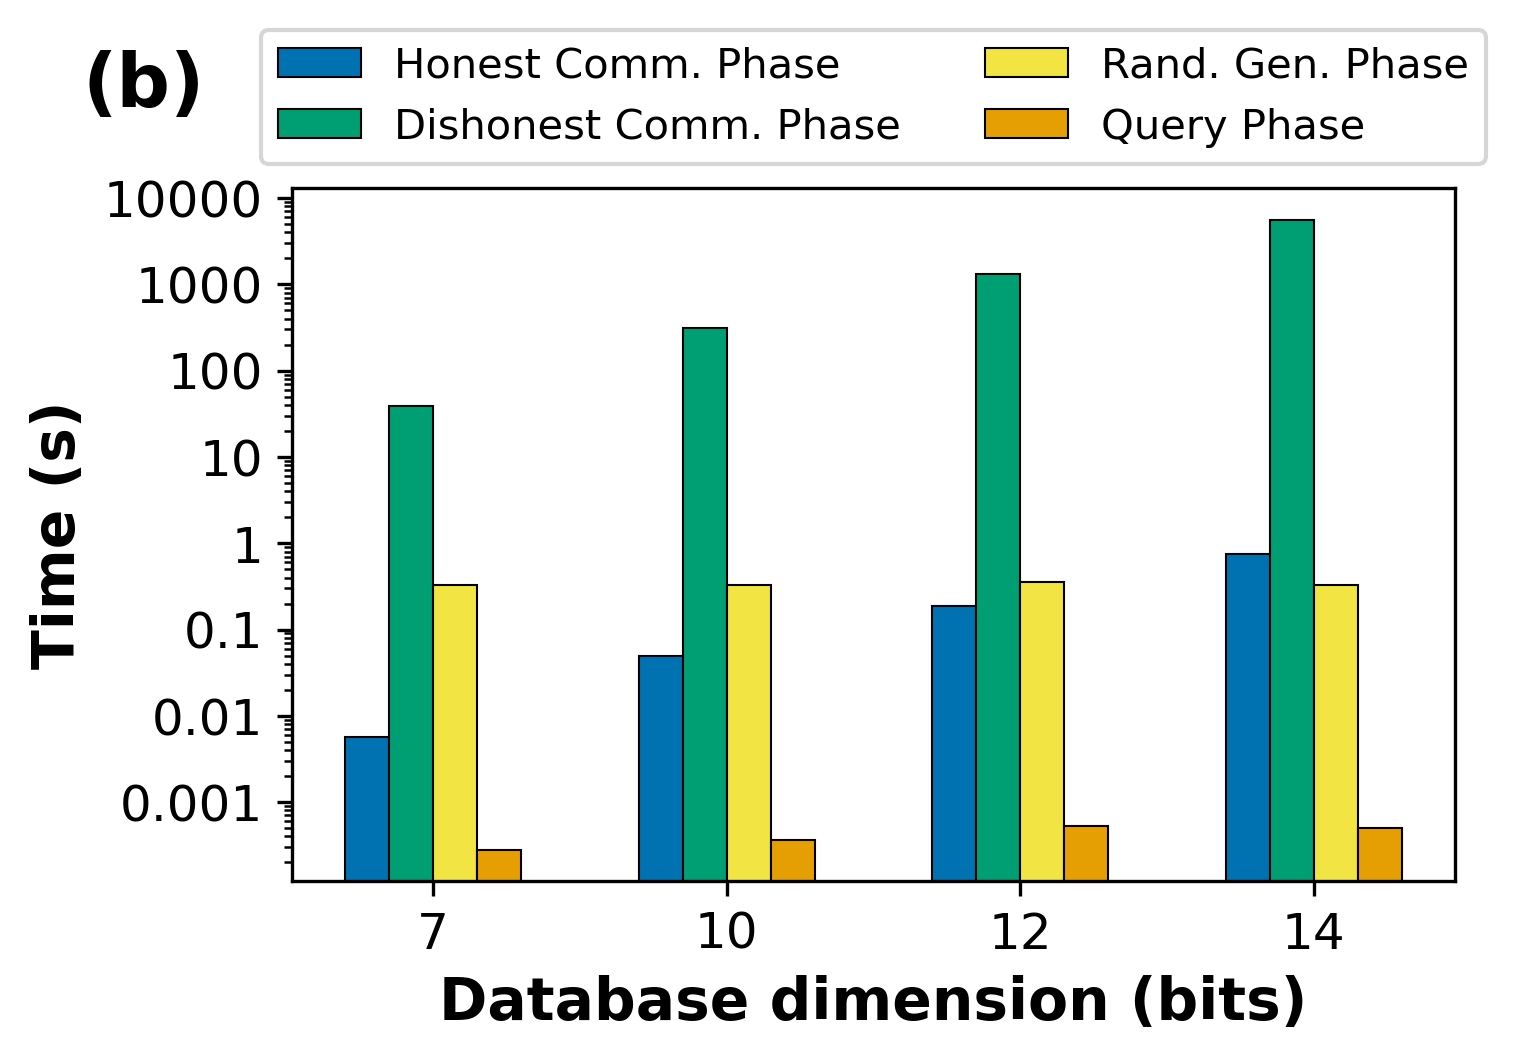

In [21]:
def db_dim_format_func(value, tick_number):
    return f'{value:.0f}' if value >= 1 else f'{value:.1f}' if value >= 0.1 else f'{value:.2f}' if value >= 0.01 else f'{value:.3f}'

db_dim_fig, db_dim_ax = plt.subplots(dpi=300, figsize=(5, 3))
bar_width = 0.15
line_width = 0.5

r1 = np.arange(len(db_dim_categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

db_dim_ax.bar(r1, db_dim_groups["Honest Comm Phase (s)"], color=COLORS['blue'], width=bar_width, linewidth=line_width, edgecolor='black', label='Honest Comm. Phase')
db_dim_ax.bar(r2, db_dim_groups["Dishonest Comm Phase (s)"], color=COLORS['green'], width=bar_width, linewidth=line_width, edgecolor='black', label='Dishonest Comm. Phase')
db_dim_ax.bar(r3, db_dim_groups["Rand Gen Phase (s)"], color=COLORS['yellow'], width=bar_width, linewidth=line_width, edgecolor='black', label='Rand. Gen. Phase')
db_dim_ax.bar(r4, db_dim_groups["Query Phase (s)"], color=COLORS['orange'], width=bar_width, linewidth=line_width, edgecolor='black', label='Query Phase')

plt.xlabel('Database dimension (bits)', fontweight='bold', fontsize=axis_font_size)
plt.xticks([r + bar_width*1.5 for r in range(len(db_dim_categories))], db_dim_categories, fontsize=tick_font_size)
plt.ylabel('Time (s)', fontweight='bold', fontsize=axis_font_size)

db_dim_ax.set_yscale('log')
db_dim_ax.yaxis.set_major_formatter(FuncFormatter(db_dim_format_func))
plt.yticks(fontsize=tick_font_size)

plt.text(-0.18, 1.2, '(b)', horizontalalignment='left', verticalalignment='top', transform=db_dim_ax.transAxes, fontweight='bold', fontsize=corner_font_size)

plt.legend(ncol=2, bbox_to_anchor=(0.5, 1.005), loc='lower center', fontsize=legend_font_size)
plt.savefig('db_dim.png', dpi=300, bbox_inches='tight')
plt.show()

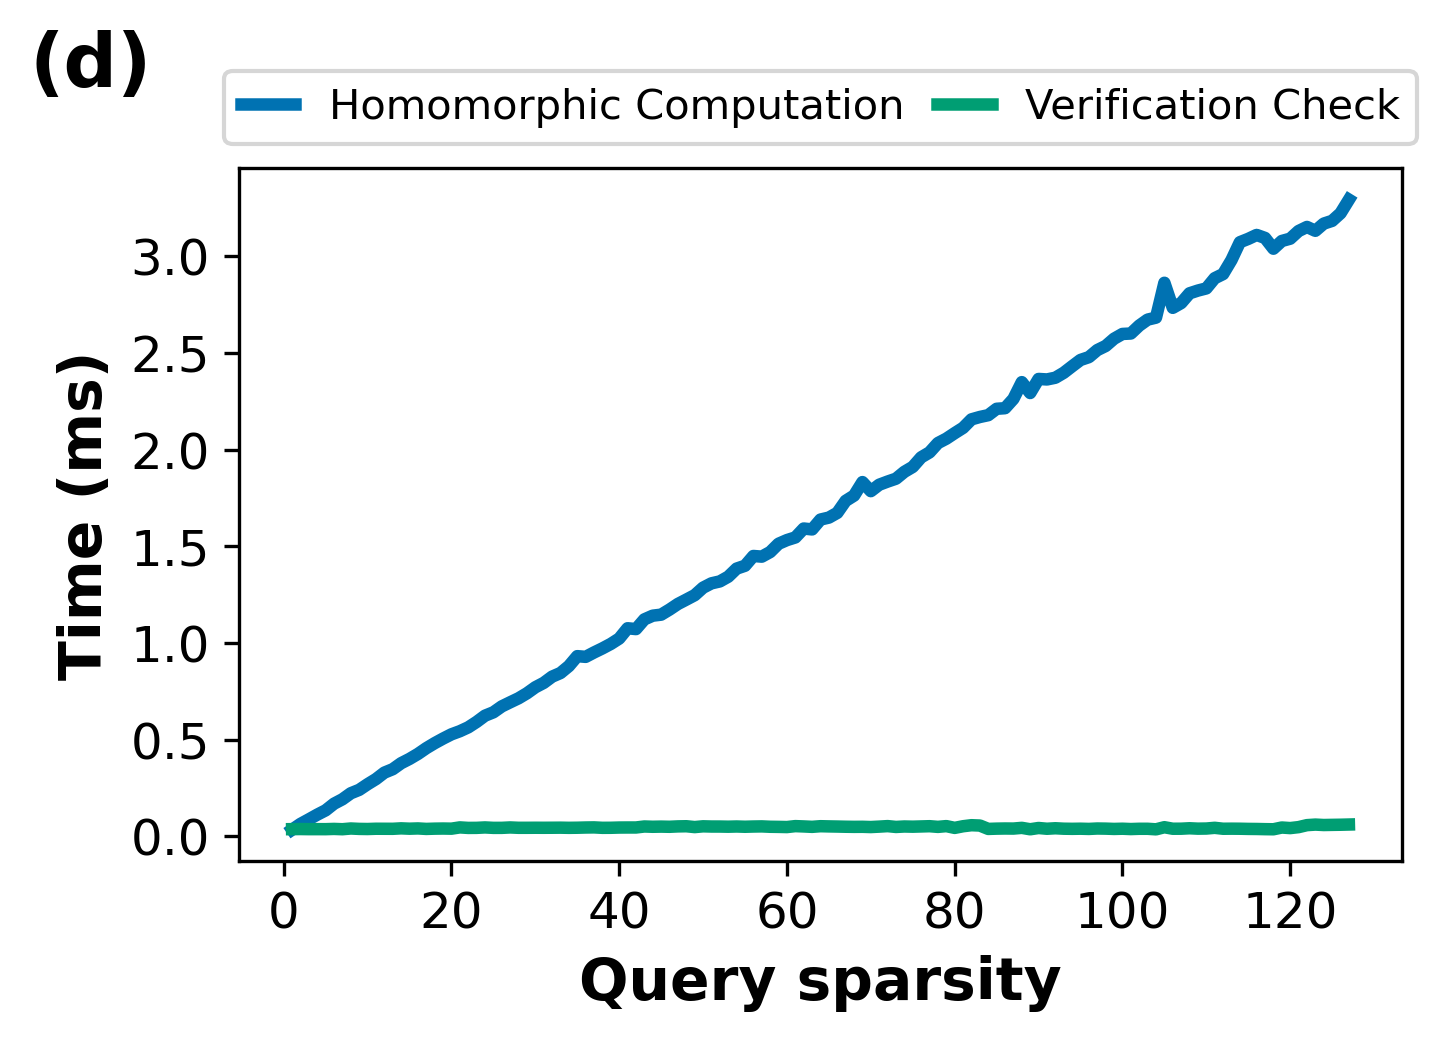

In [22]:
sparsity_line_fig, sparsity_line_ax = plt.subplots(dpi=300, figsize=(5, 3))
marker_size = 1
linewidth = 3

sparsity_line_ax.plot(sparsity_x, [y * 1000 for y in sparsity_homomorphic_s], linewidth=linewidth, color=COLORS['blue'], label='Homomorphic Computation', marker='.', markersize=marker_size)
sparsity_line_ax.plot(sparsity_x, [y * 1000 for y in sparsity_verify_s], linewidth=linewidth, color=COLORS['green'], label='Verification Check', marker='.', markersize=marker_size)

plt.xlabel('Query sparsity', fontweight='bold', fontsize=axis_font_size)
plt.ylabel('Time (ms)', fontweight='bold', fontsize=axis_font_size)
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)

plt.text(-0.18, 1.2, '(d)', horizontalalignment='left', verticalalignment='top', transform=sparsity_line_ax.transAxes, fontweight='bold', fontsize=corner_font_size)

plt.legend(handlelength=1.3, columnspacing=0.8, ncol=2, bbox_to_anchor=(0.5, 1.005), loc='lower center', fontsize=legend_font_size)
plt.savefig('sparsity-line.png', dpi=300, bbox_inches='tight')
plt.show()